### Degree distribution plots

In [1]:
import pandas as pd
from IPython.display import display, HTML
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

path1 = './../../../../media/miglesia/Elements/export_france/data/type1/DP1610_MAASTRICHT1_1997_2013'

display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
for y in range(4):
    year = range(1999, 2012, 4)[y]
    print year-1

1998
2002
2006
2010


IOError: File ./data/processed/degree_dist/ID_deg_1999_3 does not exist

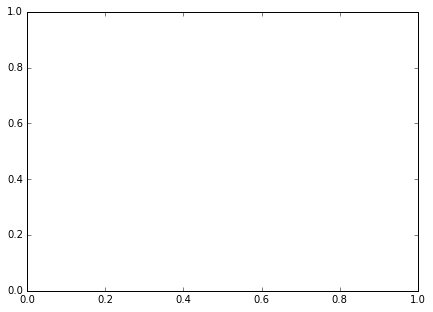

In [3]:
# bins  = np.arange(-0.25, 4.5, 0.02)
bins = range(1500)

fig, ax = plt.subplots(1, figsize = (7, 5))

# for i in range(3):
#     window = [1, 3, 5][i]
    
window = 3
for y in range(4):
    year = range(1999, 2012, 4)[y]

    df = pd.read_csv('./data/processed/degree_dist/ID_deg_'+str(year)+'_'+str(window))
    grouped = df.groupby(pd.cut(df.ID_degree, bins), observed = True)
    log_deg_dist = np.log10(grouped.agg({'ID_degree': ['mean', 'count']})).dropna()
    log_deg_dist.plot(marker = '.', x = ('ID_degree', 'mean'), y = ('ID_degree', 'count'), 
                      alpha = .5, mec = 'None', ax = ax)
    ax.set_xlabel('log degree')
    if y == 0: ax.set_ylabel('no. of FR exporter firms (log)')
    ax.legend(['1998-00', '2002-04', '2006-08', '2010-12'])

plt.savefig('./Figures/degree_distribution.png')

In [ ]:
bins  = np.arange(-0.25, 5, 0.02)
hist = plt.hist(np.log10(df.ID_degree), bins, cumulative = True, normed = True)

# bins = np.append(range(1500), range(1500, 74000, 10))
# hist = plt.hist(df.ID_degree, bins, cumulative = True, normed = True, alpha = 0)

CDF = hist[0]; bins_ = hist[1]

x = np.log10(1 - CDF)
y = (bins_[1:] + bins_[:-1])/2.
plt.plot(x, y, marker = 'o')

In [ ]:
bins  = np.arange(-0.25, 4.5, 0.02)
fig, ax = plt.subplots(1, figsize = (8, 5))


# for i in range(3):
#     window = [1, 3, 5][i]
    
window = 3
for yr in range(4):
    year = range(1999, 2012, 4)[yr]

    df = pd.read_csv('./data/processed/degree_dist/ID_deg_'+str(year)+'_'+str(window))

    hist = plt.hist(np.log10(df.ID_degree), bins, cumulative = True, normed = True, alpha = 0);

    # bins = np.append(range(1500), range(1500, 74000, 10))
    # hist = plt.hist(df.ID_degree, bins, cumulative = True, normed = True, alpha = 0)

    CDF = hist[0]; bins_ = hist[1]
    x = 1 - CDF; y = (bins_[1:] + bins_[:-1])/2.
    ax.set_xscale('log')
#     ax = axs[yr]
    ax.plot(x, y, marker = '.', alpha = .7, mec = 'None')
#         log_deg_dist.plot(marker = 'o', x = ('ID_degree', 'mean'), y = ('ID_degree', 'count'), 
#                           alpha = .3, mec = 'None', ax = ax)
#         ax.legend_.remove()
    ax.set_xlim(1e-5, 1e0); 
    ax.set_ylim(-.5, 4.5)
    ax.set_xlabel('log(1 - CDF), i.e. fraction of firms with degree at least "y"')
    ax.set_ylabel('y: log degree')
    ax.legend(['1998-00', '2002-04', '2006-08', '2010-12'])

plt.savefig('./Figures/degree_distribution_CDF.png')